In [1]:
# Setup
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as pp
init_printing()

In [2]:
# Define all measured variables and their uncertainties

R = (0.276, 0.01*0.276)    # rim radius

D_L = (35.25, 0.01*35.25)  # optical lever distance
H_L = (2.55, 0.01*2.55)    # optical lever height
Y_0 = (12.00, 0.01*12.00)  # optical grid initial height

Y = (-2.00, 0.05)          # y-position of laser spot
P = (35.183, 0.01*35.183)  # load
U = (10.236, 0.001*25.4)   # deflection

In [3]:
# Define functions for derived quantities

def phi(y, d_l, h_l, y_0):
    return -0.5*(np.arctan((y_0 + h_l + y)/d_l) -
                 np.arctan((y_0 + h_l)/d_l))

def f_alpha(p, u):
    return p/(u/1000)

def f_beta(phi, u):
    return phi/(u/1000)

def f_mu(r, beta):
    return ((8*np.pi - 24)*r*beta+2-np.pi)/((2-np.pi)*(4*r*beta-1))


(array([  12.,   36.,   92.,  181.,  232.,  219.,  125.,   69.,   29.,    5.]),
 array([ 2.23039019,  2.26893788,  2.30748557,  2.34603327,  2.38458096,
         2.42312865,  2.46167634,  2.50022404,  2.53877173,  2.57731942,
         2.61586712]),
 <a list of 10 Patch objects>)

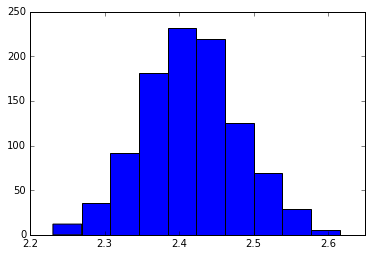

In [4]:
# Monte Carlo simulation
N_samp = 1000

# Assume normal distributions for all quantities
R_mc = R[0] + R[1]*np.random.randn(N_samp)

D_L_mc = D_L[0] + D_L[1]*np.random.randn(N_samp)
H_L_mc = H_L[0] + H_L[1]*np.random.randn(N_samp)
Y_0_mc = Y_0[0] + Y_0[1]*np.random.randn(N_samp)

Y_mc = Y[0] + Y[1]*np.random.randn(N_samp)
P_mc = P[0] + P[1]*np.random.randn(N_samp)
U_mc = U[0] + U[1]*np.random.randn(N_samp)

# Calculate derived quantities
PHI = phi(Y_mc, D_L_mc, H_L_mc, Y_0_mc)
ALPHA = f_alpha(U_mc, U_mc)
BETA = f_beta(PHI, U_mc)

MU = f_mu(R_mc, BETA)

pp.hist(BETA)